In [17]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### training_set

In [18]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### validation_set

In [19]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [20]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [21]:
for x,y in training_set:
    print("x",x)
    print("y",y)
    print(x.shape)
    print(y.shape)
    break

x tf.Tensor(
[[[[150.5  145.5  139.5 ]
   [155.5  150.5  144.5 ]
   [159.5  154.5  148.5 ]
   ...
   [160.   151.   146.  ]
   [156.25 147.25 142.25]
   [152.75 143.75 138.75]]

  [[152.25 147.25 141.25]
   [157.   152.   146.  ]
   [160.75 155.75 149.75]
   ...
   [157.   148.   143.  ]
   [159.25 150.25 145.25]
   [156.25 147.25 142.25]]

  [[154.75 149.75 143.75]
   [159.25 154.25 148.25]
   [161.75 156.75 150.75]
   ...
   [156.75 147.75 142.75]
   [159.   150.   145.  ]
   [157.75 148.75 143.75]]

  ...

  [[118.75 136.5  114.75]
   [140.   158.   134.  ]
   [171.25 190.   162.  ]
   ...
   [168.5  158.5  156.5 ]
   [172.25 162.25 160.25]
   [162.75 152.75 150.75]]

  [[125.75 144.   118.  ]
   [157.25 176.   148.  ]
   [124.5  143.75 111.5 ]
   ...
   [162.75 152.75 150.75]
   [169.   159.   157.  ]
   [168.25 158.25 156.25]]

  [[135.5  154.5  125.  ]
   [121.25 140.25 108.75]
   [142.25 162.   127.75]
   ...
   [168.5  158.5  156.5 ]
   [172.75 162.75 160.75]
   [171.25 161.25 

In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [25]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Dropout(0.25))

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(units=1500,activation='relu'))

In [32]:
model.add(Dropout(0.4))

In [33]:
model.add(Dense(units=38,activation='softmax'))

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

### model summery

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 62, 62, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### model trining

In [36]:
training_history =model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1311s 596ms/step - accuracy: 0.4041 - loss: 2.1039 - val_accuracy: 0.8538 - val_loss: 0.4828
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1209s 550ms/step - accuracy: 0.8438 - loss: 0.4943 - val_accuracy: 0.9237 - val_loss: 0.2453
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1203s 548ms/step - accuracy: 0.9130 - loss: 0.2748 - val_accuracy: 0.9389 - val_loss: 0.1902
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1210s 551ms/step - accuracy: 0.9390 - loss: 0.1898 - val_accuracy: 0.9560 - val_loss: 0.1406
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1205s 548ms/step - accuracy: 0.9539 - loss: 0.1424 - val_accuracy: 0.9460 - val_loss: 0.1695
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1211s 551ms/step - accuracy: 0.9653 - loss: 0.1031 - val_accuracy: 0.9630 - val_loss: 0.1191
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1209s 550ms/step - accuracy: 0.9708 - loss: 0.0876 - val_accuracy: 0.9451 - val_loss: 0.1717
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1206s 549ms/s

### Evaluating Model

In [37]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 267s 121ms/step - accuracy: 0.9754 - loss: 0.0758
Training accuracy: 0.9770253896713257


In [38]:
print(train_loss, train_acc)

0.07099136710166931 0.9770253896713257


In [39]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 93s 169ms/step - accuracy: 0.9488 - loss: 0.1920
Validation accuracy: 0.9503756165504456


In [40]:
print(val_loss, val_acc)

0.18209052085876465 0.9503756165504456


### saving model

In [44]:
model.save("trained_model.keras")

In [45]:
training_history.history

{'accuracy': [0.6085638999938965,
  0.8652962446212769,
  0.9187709093093872,
  0.9424994587898254,
  0.9554164409637451,
  0.9661995768547058,
  0.9717333912849426,
  0.9760438203811646,
  0.9790738821029663,
  0.983270525932312],
 'loss': [1.3285571336746216,
  0.4252333343029022,
  0.2529500126838684,
  0.17808207869529724,
  0.13532228767871857,
  0.1021430492401123,
  0.08521373569965363,
  0.07202834635972977,
  0.06299284845590591,
  0.05222930386662483],
 'val_accuracy': [0.8538014888763428,
  0.9236854314804077,
  0.9389369487762451,
  0.956009566783905,
  0.9459936022758484,
  0.9630093574523926,
  0.9450830817222595,
  0.9709765315055847,
  0.9578306674957275,
  0.9503756165504456],
 'val_loss': [0.4828309118747711,
  0.24525198340415955,
  0.19019299745559692,
  0.14060468971729279,
  0.16948945820331573,
  0.11907389014959335,
  0.17172323167324066,
  0.10373926907777786,
  0.1416197419166565,
  0.18209049105644226]}

### history in json 

In [46]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [47]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Accuracy Visualization

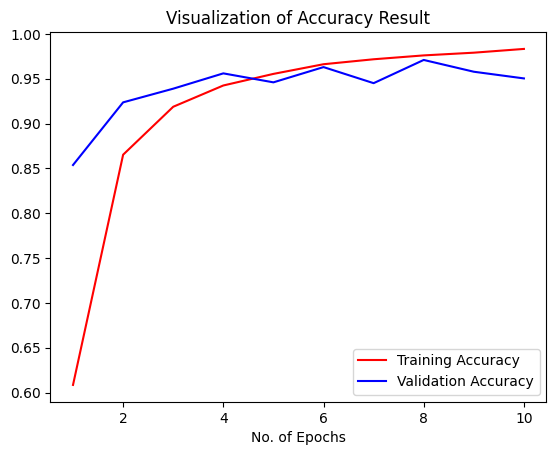

In [48]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [50]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [51]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [53]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 348s 20ms/step


In [54]:
y_pred,y_pred.shape

(array([[1.0000000e+00, 1.5318737e-10, 2.0449301e-13, ..., 4.5790754e-20,
         3.6249103e-17, 5.0200337e-17],
        [1.0000000e+00, 3.6323939e-08, 1.2779360e-09, ..., 6.3450253e-16,
         7.9472767e-13, 2.4010555e-14],
        [1.0000000e+00, 1.9296920e-11, 8.0457125e-13, ..., 9.0440477e-22,
         2.8823893e-17, 2.7509092e-17],
        ...,
        [2.5692560e-07, 8.1442708e-10, 2.3264127e-07, ..., 5.0072099e-08,
         2.0290782e-08, 9.9642366e-01],
        [1.1400880e-11, 4.5608564e-13, 1.1788776e-10, ..., 9.0911043e-11,
         2.1107227e-11, 9.9999988e-01],
        [7.5618510e-13, 6.4291644e-13, 4.3281359e-12, ..., 6.2764516e-12,
         1.8252103e-09, 9.9991786e-01]], dtype=float32),
 (17572, 38))

In [55]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [56]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [58]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [57]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [65]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.97      0.95       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.98      0.92      0.95       502
                               Blueberry___healthy       0.91      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.83      0.89       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.98      0.

### Confusion Matrix Visualization

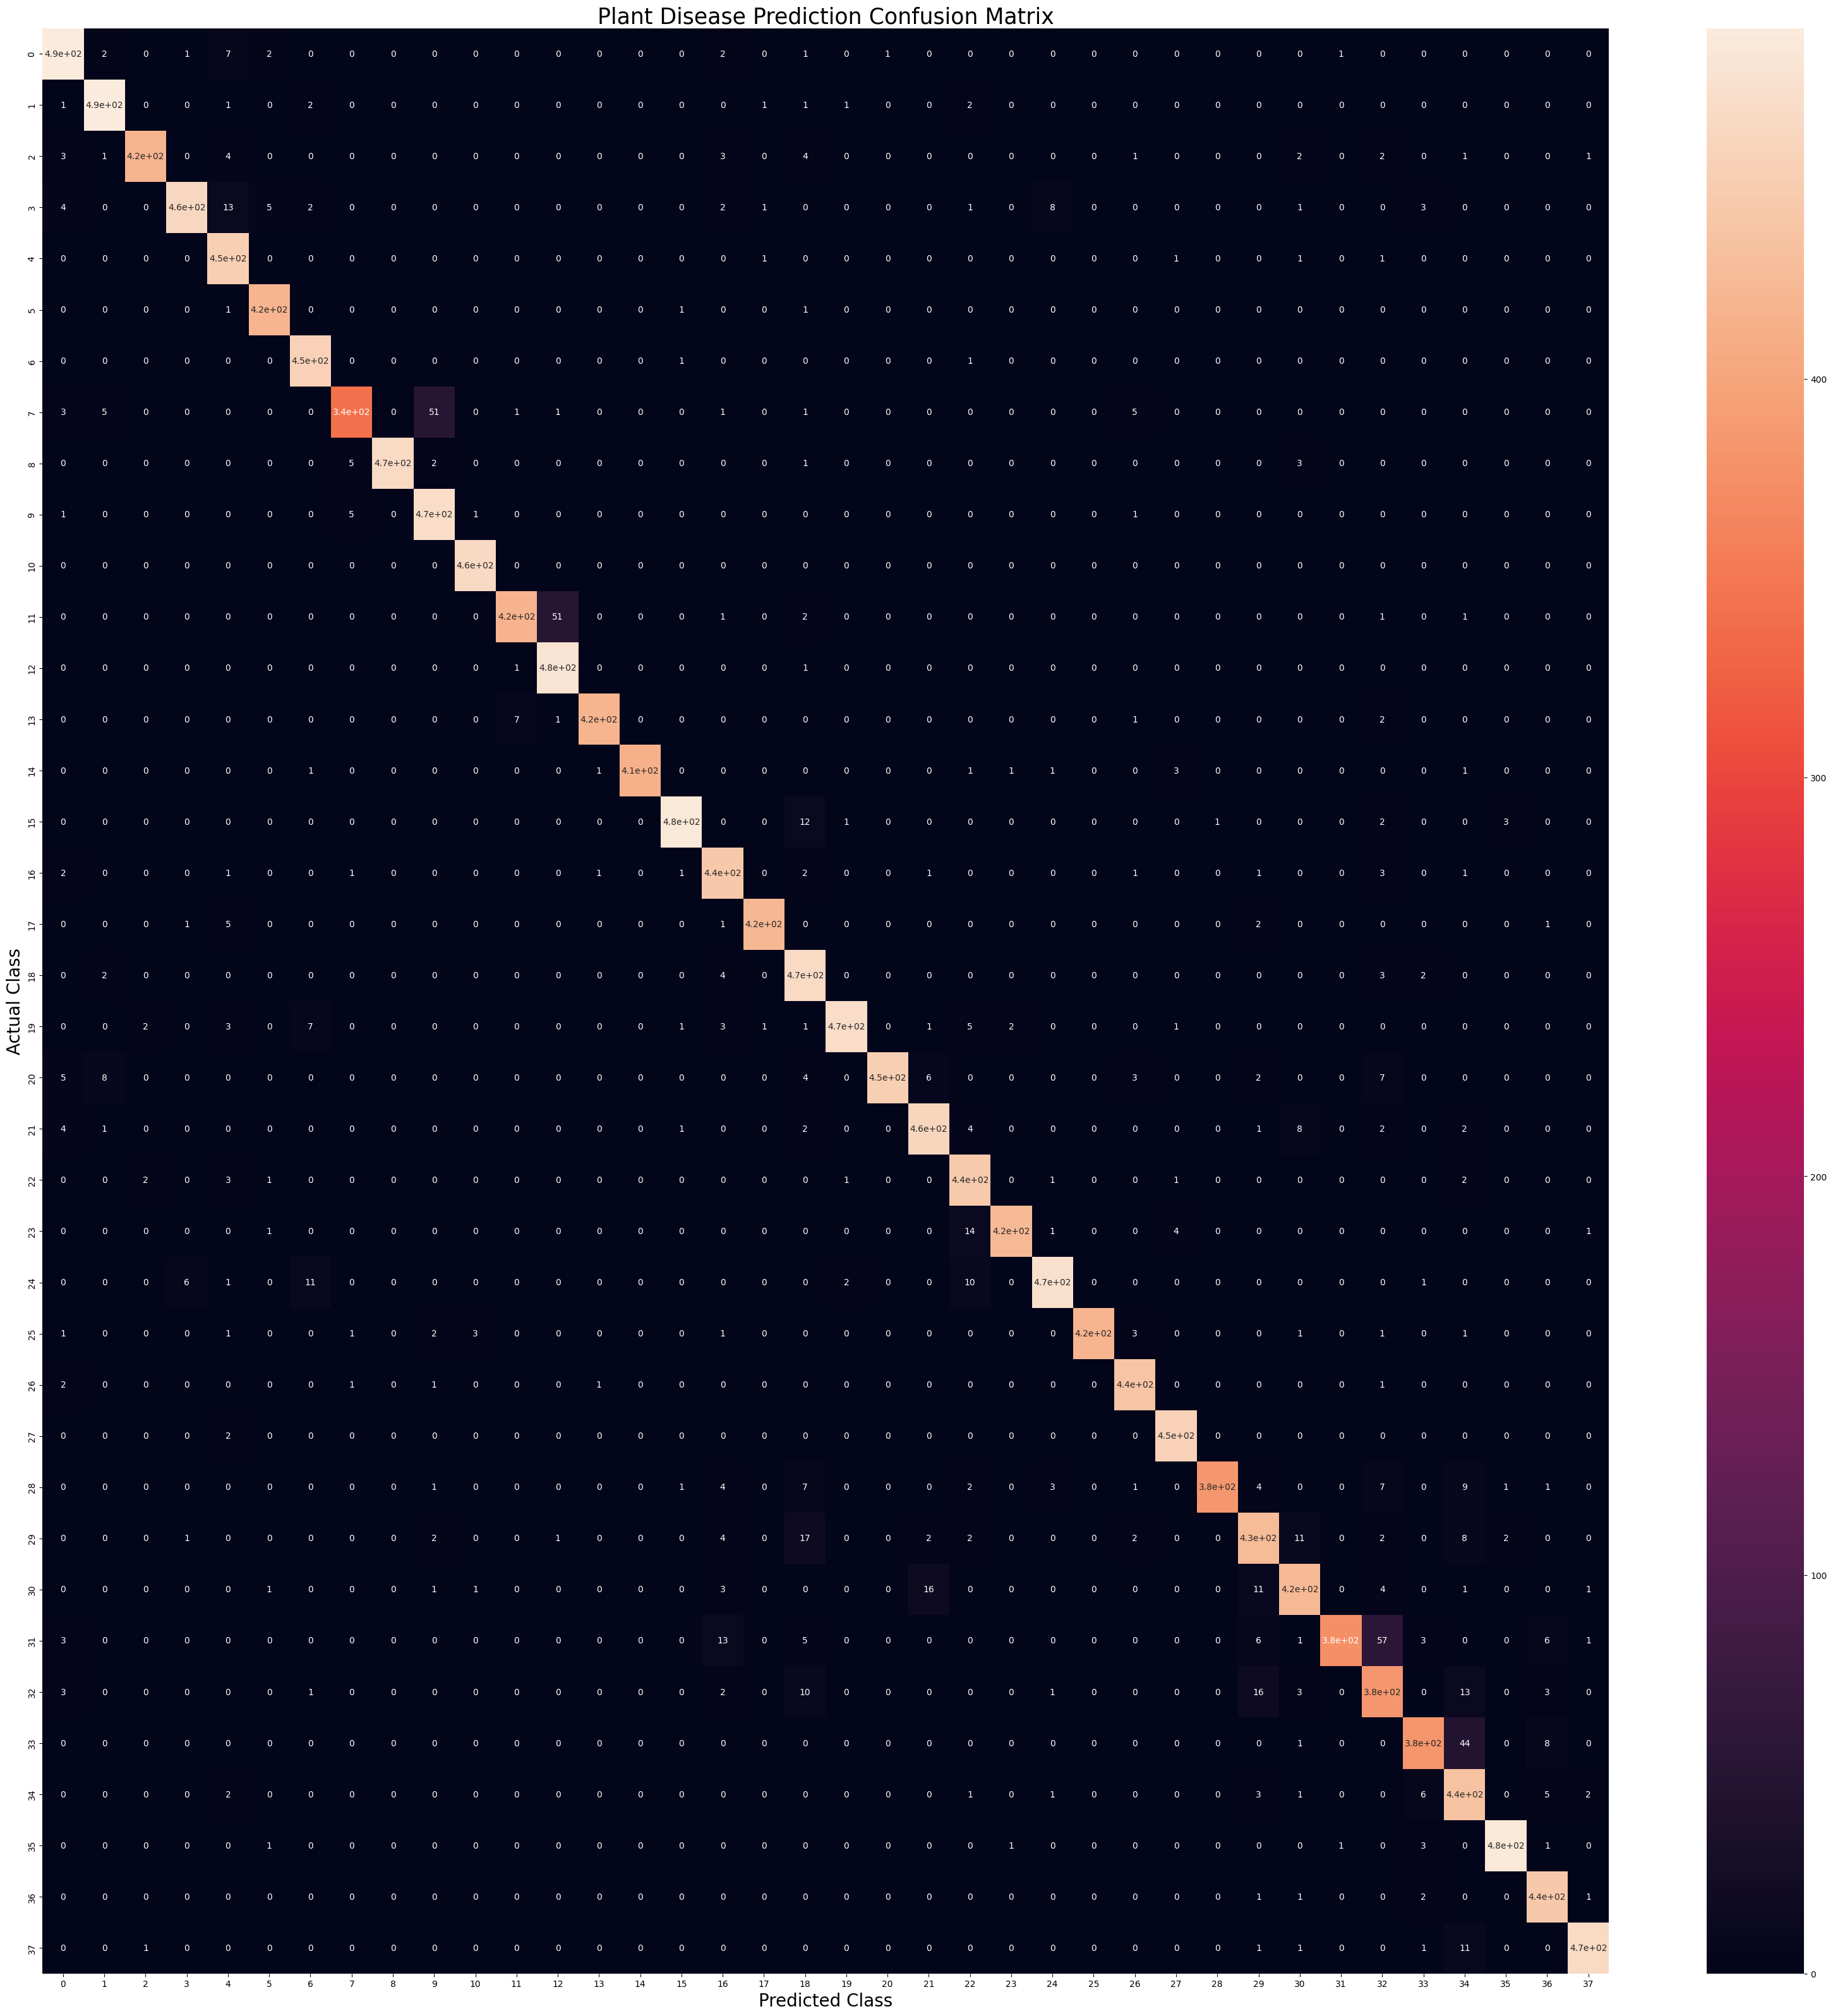

In [66]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()